# [실습] RNN-단순 RNN, LSTM, GRU 모델 비교하기

### 1)  시퀀스 데이터 준비

In [2]:
import numpy as np

# 0.0, 0.1, .. 증가하는 시퀀스 데이터를 생성함
# seq_len 길이를 가지는 시퀀스 데이터를 size 갯수만큼 생성한다
def sequence_gen(size, seq_len):
    # 비어있는 넘파이 배열을 생성한다.
    seq_X = np.empty(shape=(size, seq_len, 1))
    Y = np.empty(shape=(size,))

    for i in range(size):
        # [0, 0.1, 0.2, .. ]같은 시퀀스와 Y 값을 size 갯수만큼 생성
        c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
        seq_X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
        Y[i] = (i+seq_len) / 10       # 목표값을 생성함

    return seq_X, Y

# 길이가 16인 시퀀스 8개를 훈련용으로 만든다
n, seq_len = 8, 16   
train_seq_X, train_Y = sequence_gen(n, seq_len)

In [3]:
print('훈련용 데이터')
for i in range(n):
    print(train_seq_X[i].flatten(), train_Y[i])

half_n, offset = int(n/2), 1.0
test_seq_X = train_seq_X[:half_n] + offset
test_Y = train_Y[:half_n] + offset

print('검증용 데이터')
for i in range(half_n):
    print(test_seq_X[i].flatten(), test_Y[i])

훈련용 데이터
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 1.6
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 1.7
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7] 1.8
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 1.9
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 2.0
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 2.1
[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1] 2.2
[0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 2.3
검증용 데이터
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5] 2.6
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 2.7
[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 2.8
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8] 2.9


### 단순 RNN과 다층 RNN, LSTM, GRU 모델의 비교 


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

#### 1) 단순 RNN모델

In [5]:
SimpleRNN_model = Sequential([
    SimpleRNN(units=256, return_sequences=False, input_shape=(16,1)),
    Dense(1)
])

SimpleRNN_model.compile(loss='mse', metrics='mse', optimizer='adam')

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-28 10:34:19.454169: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-28 10:34:19.455538: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
SimpleRNN_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100


2023-02-28 10:34:40.243027: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-28 10:34:40.715408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 6.5780 - mse: 6.5780
Epoch 2/100
1/1 [==============================] - 0s 88ms/step - loss: 0.1795 - mse: 0.1795
Epoch 3/100
1/1 [==============================] - 0s 94ms/step - loss: 0.7536 - mse: 0.7536
Epoch 4/100
1/1 [==============================] - 0s 85ms/step - loss: 0.6120 - mse: 0.6120
Epoch 5/100
1/1 [==============================] - 0s 87ms/step - loss: 0.0395 - mse: 0.0395
Epoch 6/100
1/1 [==============================] - 0s 122ms/step - loss: 0.2040 - mse: 0.2040
Epoch 7/100
1/1 [==============================] - 0s 90ms/step - loss: 0.3834 - mse: 0.3834
Epoch 8/100
1/1 [==============================] - 0s 115ms/step - loss: 0.2401 - mse: 0.2401
Epoch 9/100
1/1 [==============================] - 0s 90ms/step - loss: 0.0608 - mse: 0.0608
Epoch 10/100
1/1 [==============================] - 0s 85ms/step - loss: 0.0021 - mse: 0.0021
Epoch 11/100
1/1 [==============================] - 0s 89ms/step - loss: 0.0504 -

In [12]:
result = SimpleRNN_model.predict(test_seq_X)
result = result.flatten()
print(f'예측값: {np.round(result,3)}')
print(f'실제값: {test_Y}')

1/1 [==============================] - 0s 33ms/step
예측값: [2.409 2.449 2.485 2.517]
실제값: [2.6 2.7 2.8 2.9]


#### 2) 다층 RNN 모델

In [24]:
multiRNN_model = Sequential([
    SimpleRNN(units=256, return_sequences=True, input_shape=(16,1)),
    SimpleRNN(256, return_sequences=True),
    SimpleRNN(256, return_sequences=True),
    SimpleRNN(256, return_sequences=False),
    Dense(1)
])

multiRNN_model.compile(loss='mse', metrics='mse', optimizer='adam')
multiRNN_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (None, 16, 256)           66048     
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 16, 256)           131328    
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 16, 256)           131328    
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 460,289
Trainable params: 460,289
Non-trainable params: 0
_________________________________________________________________


In [25]:
multiRNN_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100


2023-02-28 10:49:06.680982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 11.1766 - mse: 11.1766
Epoch 2/100
1/1 [==============================] - 1s 543ms/step - loss: 8.3382 - mse: 8.3382
Epoch 3/100
1/1 [==============================] - 1s 571ms/step - loss: 5.7643 - mse: 5.7643
Epoch 4/100
1/1 [==============================] - 1s 535ms/step - loss: 0.1818 - mse: 0.1818
Epoch 5/100
1/1 [==============================] - 1s 529ms/step - loss: 0.3363 - mse: 0.3363
Epoch 6/100
1/1 [==============================] - 1s 529ms/step - loss: 0.3484 - mse: 0.3484
Epoch 7/100
1/1 [==============================] - 1s 570ms/step - loss: 0.0519 - mse: 0.0519
Epoch 8/100
1/1 [==============================] - 1s 528ms/step - loss: 0.1721 - mse: 0.1721
Epoch 9/100
1/1 [==============================] - 1s 531ms/step - loss: 0.2421 - mse: 0.2421
Epoch 10/100
1/1 [==============================] - 1s 527ms/step - loss: 0.1043 - mse: 0.1043
Epoch 11/100
1/1 [==============================] - 1s 545ms/step - loss

In [26]:
result = multiRNN_model.predict(test_seq_X)
result = result.flatten()
print(f'예측값: {np.round(result,3)}')
print(f'실제값: {test_Y}')

1/1 [==============================] - 0s 309ms/step
예측값: [2.465 2.509 2.548 2.582]
실제값: [2.6 2.7 2.8 2.9]


2023-02-28 10:50:01.292774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


#### 3) LSTM모델

In [18]:
LSTM_model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(16,1)),
    Dense(1)
])

LSTM_model.compile(loss='mse', metrics='mse', optimizer='adam')
LSTM_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [19]:
LSTM_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100


2023-02-28 10:45:53.909236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-28 10:45:54.059941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-28 10:45:54.913449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 4.1838 - mse: 4.1838
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 3.0914 - mse: 3.0914
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 2.1523 - mse: 2.1523
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 1.3166 - mse: 1.3166
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5907 - mse: 0.5907
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0890 - mse: 0.0890
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.1688 - mse: 0.1688
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5403 - mse: 0.5403
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3525 - mse: 0.3525
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0922 - mse: 0.0922
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0079 - m

In [20]:
result = LSTM_model.predict(test_seq_X)
result = result.flatten()
print(f'예측값: {np.round(result,3)}')
print(f'실제값: {test_Y}')

2023-02-28 10:45:58.800218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-28 10:45:58.849293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 338ms/step
예측값: [2.575 2.66  2.743 2.824]
실제값: [2.6 2.7 2.8 2.9]


#### 4) GRU 모델

In [21]:
GRU_model = Sequential([
    GRU(256, return_sequences=False, input_shape=(16,1)),
    Dense(1)
])

GRU_model.compile(loss='mse', metrics='mse', optimizer='adam')
GRU_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               198912    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 199,169
Trainable params: 199,169
Non-trainable params: 0
_________________________________________________________________


In [22]:
GRU_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100


2023-02-28 10:47:22.426706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-28 10:47:22.576788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-28 10:47:22.971073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step - loss: 4.0107 - mse: 4.0107
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 3.0181 - mse: 3.0181
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 2.1671 - mse: 2.1671
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 1.4429 - mse: 1.4429
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.8422 - mse: 0.8422
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 0.3766 - mse: 0.3766
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0792 - mse: 0.0792
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0074 - mse: 0.0074
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1801 - mse: 0.1801
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3644 - mse: 0.3644
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3646 - m

In [23]:
result = GRU_model.predict(test_seq_X)
result = result.flatten()
print(f'예측값: {np.round(result,3)}')
print(f'실제값: {test_Y}')

1/1 [==============================] - 0s 311ms/step
예측값: [2.567 2.66  2.752 2.843]
실제값: [2.6 2.7 2.8 2.9]


2023-02-28 10:47:39.017984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-02-28 10:47:39.063097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


# [quiz] Sign곡선(비선형 시퀀스) 예측
- Sign곡선에서 일부를 잘라 만든 시퀀스를 보고, 이 시퀀스 다음에 나타날 값을 예측하는 순환 신경망 모델 만들기

- 단순 RNN, LSTM, GRU 모델을 각각 구현하고 예측 성능을 비교하라

#### 데이터 준비

In [3]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 100, 10
# 비어있는 넘파이 배열을 생성한다.
seq_X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [4]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [5]:
shift = np.random.randn(size) # 시퀀스 추출에 사용할 구간을 옮겨 놓는 값
# 구간의 마지막 값이 정답 레이블
for i in range(size):
    seq_X[i,:,:] = np.sin(shift[i] + interval[:-1]).reshape(seq_len, 1)
    Y[i] = np.sin(shift[i] + interval[-1])

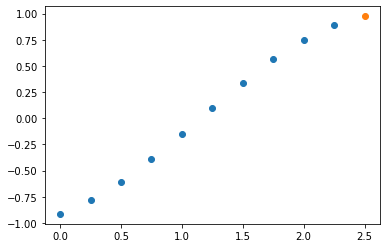

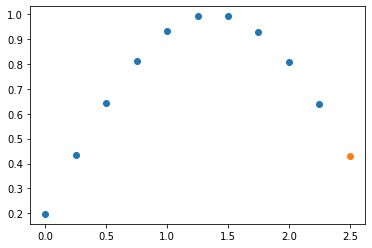

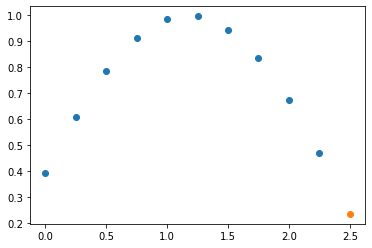

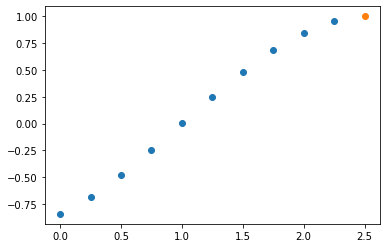

In [6]:
# 생성된 시퀀스 데이터 가운데 몇 개 확인
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :,:])
    plt.scatter(interval[-1], Y[i])
    plt.show()

In [7]:
#  데이터 분할
train_X = seq_X[:80]
train_y = Y[:80]
test_X = seq_X[80:]
test_y = Y[80:]

* SimpleRNN 모델

* LSTM 모델

* GRU 모델